In [57]:
library(ape)
library(treeio)
library(ggtree)
library(ggplot2)
library(tidyverse)

In [58]:
setwd("/Users/ben/projects/Doran_etal_2022")

In [59]:
ddir = file.path(getwd(), "data", "exp_pro", "banfield_etal_data")

In [60]:
pdir = file.path(getwd(), "plots", "uniprot_and_banfield_spitrees")
dir.create(pdir, FALSE, TRUE)

## Hug et al. tree

In [36]:
file.path(ddir, "justbacteria_data", "subset_alignment.csv")

[1] "/Users/ben/projects/Doran_etal_2022/data/exp_pro/banfield_etal_data/justbacteria_data/subset_alignment.csv"

In [37]:
alignmentdf = read.csv(file.path(ddir, "justbacteria_data", "subset_alignment.csv"))
# alignmentdf %>% head

In [38]:
banfield_spi_tree = read.newick(file.path(ddir, "justbacteria_data", "spitree.neighborjoined.supporttree.nw"), node.label='support')

In [39]:
lineagedf = read.csv(file.path(ddir, "justbacteria_data", "subset_lineage.csv"))
lineagedf$label = lineagedf$ORGANISM
subset_lineagedf = lineagedf[match(banfield_spi_tree@phylo$tip.label, lineagedf$label),]

In [40]:
subset_lineagedf %>% dim

[1] 2117   14

In [41]:
sort(table(subset_lineagedf$phylum), decreasing = TRUE)[sort(table(subset_lineagedf$phylum), decreasing = TRUE) > 100]


Proteobacteria     Firmicutes Actinobacteria  Bacteroidetes 
           449            177            149            120 

In [42]:
biggerphylum  = sort(table(subset_lineagedf$phylum), decreasing = TRUE)[sort(table(subset_lineagedf$phylum), decreasing = TRUE) > 100]
bigphylum = subset_lineagedf$phylum
bigphylum[!(bigphylum %in% names(biggerphylum))] = "Misc. (# < 100)"
bigphylum[bigphylum == ""] = "unknown"
subset_lineagedf$bigphylum = bigphylum

In [43]:
banfield_spitree_withdata = as.treedata(left_join(as_tibble(banfield_spi_tree), subset_lineagedf, by='label'))

In [44]:
btree_tbl = as_tibble(banfield_spitree_withdata)

mode_phylum = offspring(btree_tbl, btree_tbl$node, tiponly = FALSE, self_include = TRUE)
mode_phylum = unlist(lapply(mode_phylum, function(x) modeest::mfv1(x$bigphylum, na_rm=TRUE)))

btree_tbl$mode_phylum = mode_phylum
banfield_spitree_withdata = as.treedata(btree_tbl)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



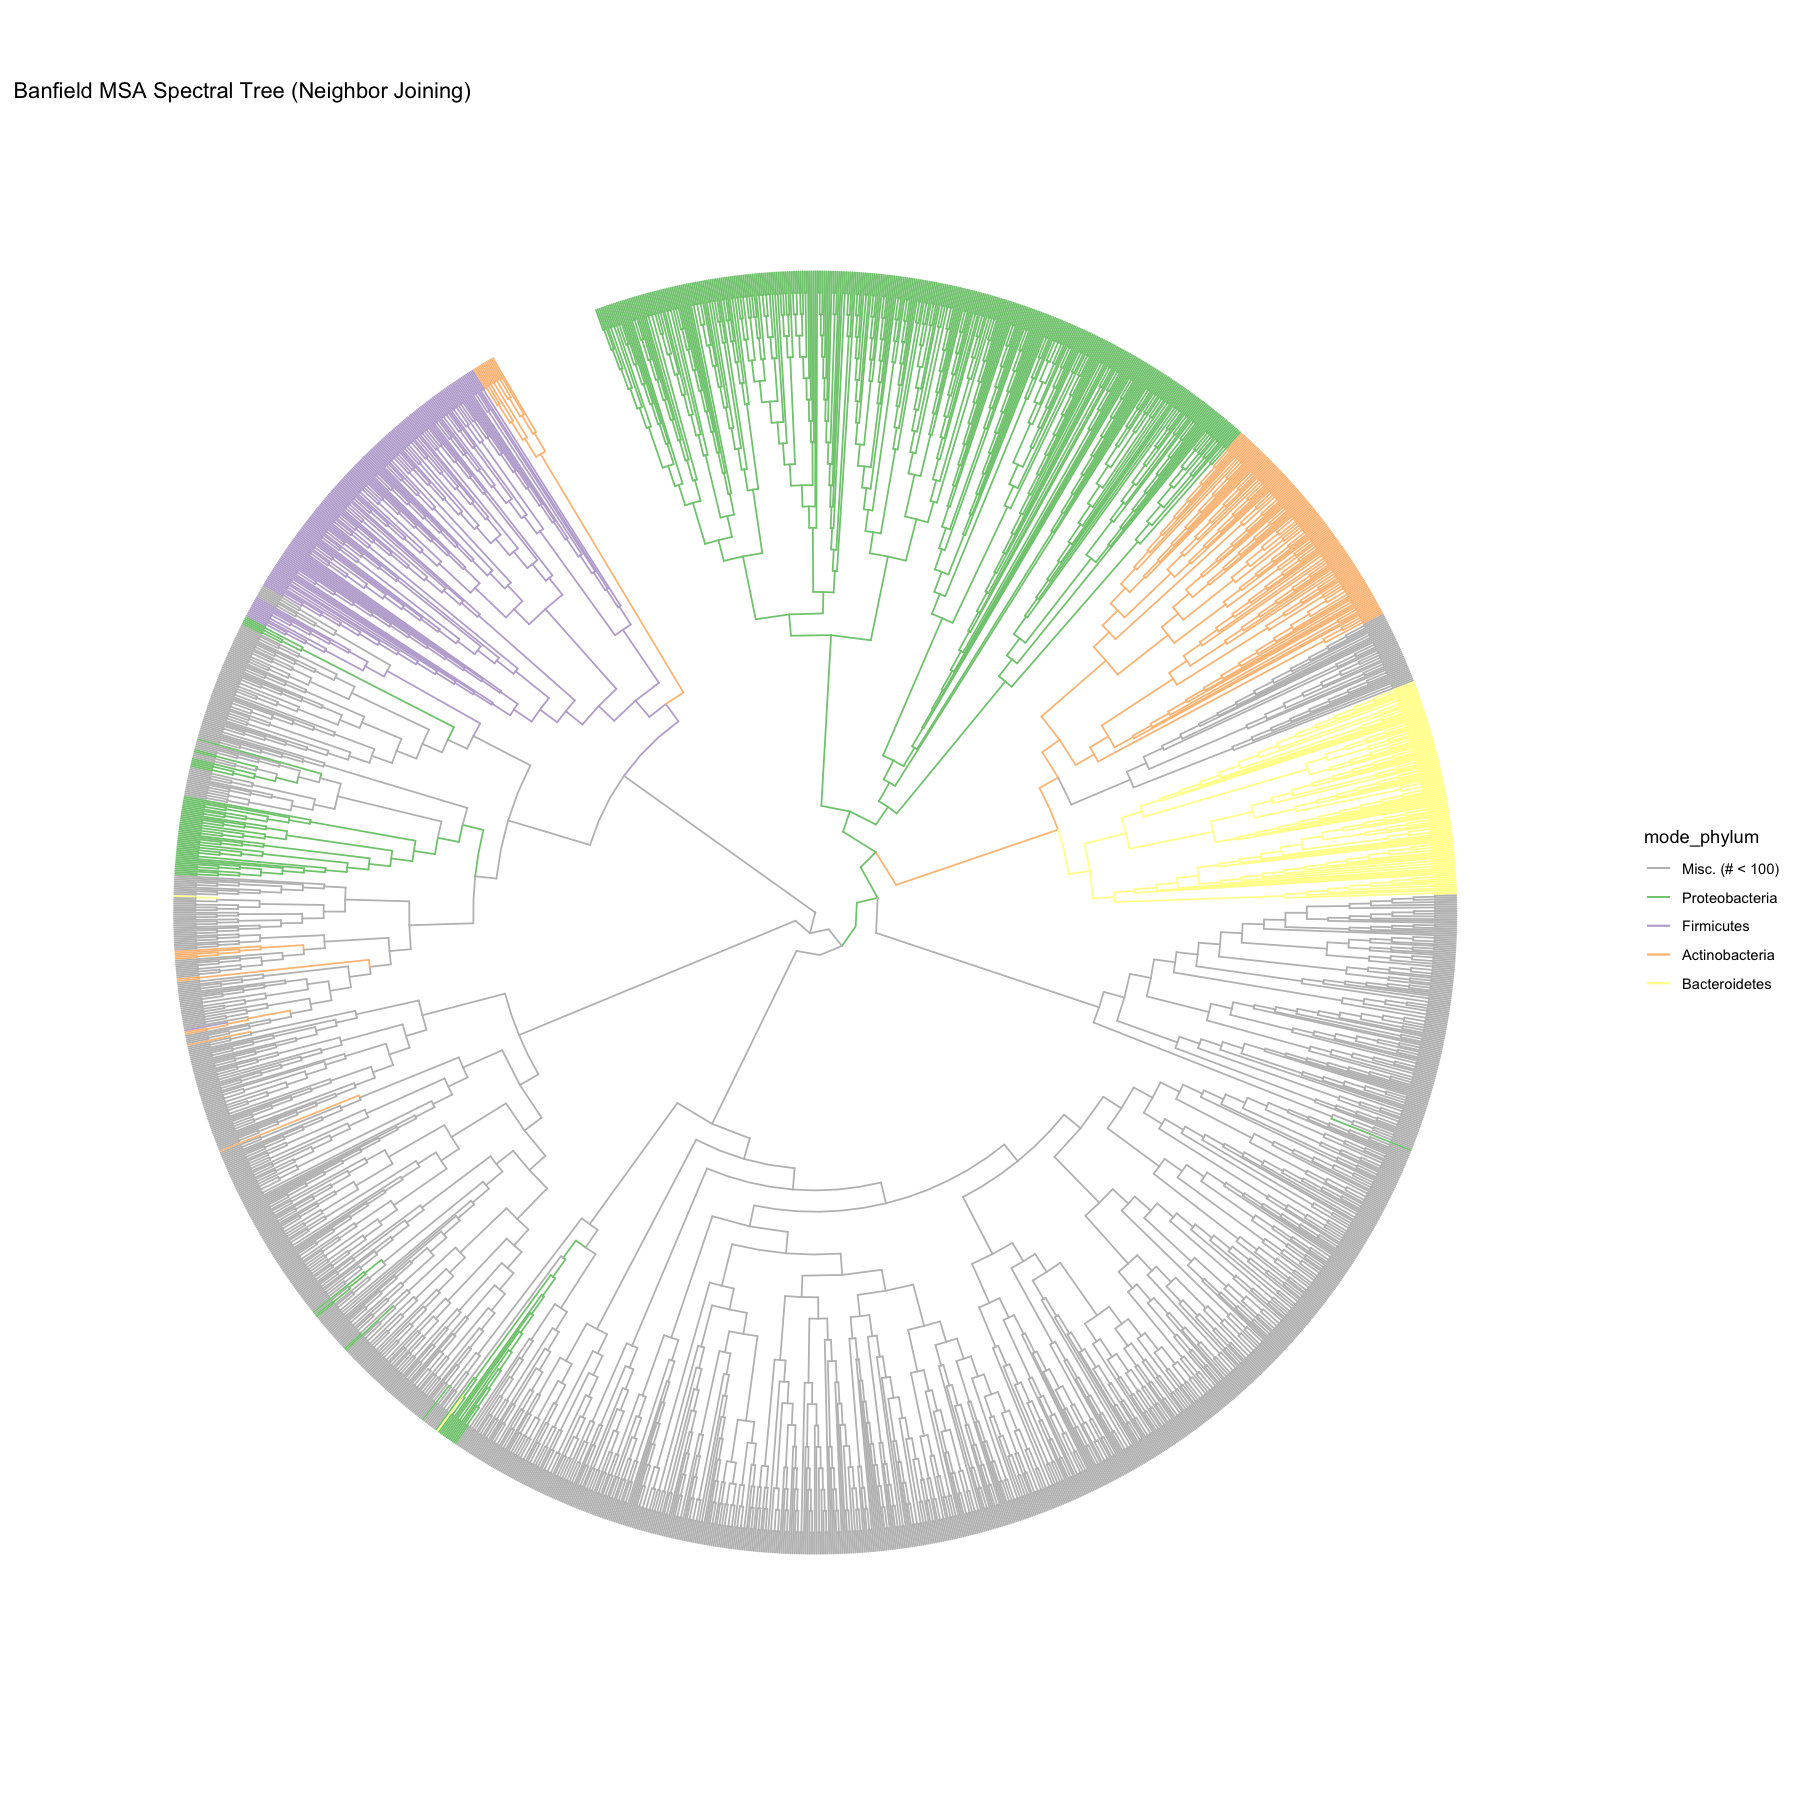

In [45]:
options(repr.plot.width=15, repr.plot.height=15, ignore.negative.edge=TRUE)
colorvalues = c("grey", RColorBrewer::brewer.pal(4, name="Accent"), "darkgrey")
ggtree(banfield_spitree_withdata, 
    aes(color=mode_phylum), 
    layout="fan", open.angle=10,
    branch.length="none",
    )  %>% rotate_tree(-240) +
    ggtitle("Banfield MSA Spectral Tree (Neighbor Joining)") + 
    scale_color_manual(values=colorvalues, breaks=c("Misc. (# < 100)", names(biggerphylum), "unknown")) #+theme(legend.position="none")

In [21]:
ggsave(file.path(pdir, "Banfield_SPItree_coloredbyPhylum_justbacteria.pdf"), 
    height=7,
    width=7,
)

In [46]:
unique(as_tibble(banfield_spitree_withdata)$phylum) %>% length

[1] 109

## Uniprot tree

In [65]:
updir = file.path(getwd(), "data", "exp_raw", "UP7047")
uptreedir = file.path(getwd(), "_research", "UP7047_neighborjoined_spitree")

In [64]:
uniprot_spitree = read.newick(file.path(uptreedir, "2020_02_UP7047-supporttree.nw"), node.label='support')

In [271]:
uplineage = read.csv(file.path(updir, "UProwmeta.csv"))
uplineage$label = uplineage$Proteome_ID

biggerphyla  = sort(table(uplineage$Phylum), decreasing = TRUE)[sort(table(uplineage$Phylum), decreasing = TRUE) > 100]
bigPhylum = uplineage$Phylum
bigPhylum[!(bigPhylum %in% names(biggerphyla))] = "Misc. (# < 100)"
uplineage$bigPhylum = bigPhylum

uniprot_spitree_withdata = as.treedata(left_join(as_tibble(uniprot_spitree), uplineage, by='label'))
utree_tbl = as_tibble(uniprot_spitree_withdata)

mode_phylum = offspring(utree_tbl, utree_tbl$node, tiponly = FALSE, self_include = TRUE)
mode_phylum = unlist(lapply(mode_phylum, function(x) modeest::mfv1(x$bigPhylum, na_rm=TRUE)))

utree_tbl$mode_phylum = mode_phylum
uniprot_spitree_withdata = as.treedata(utree_tbl)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



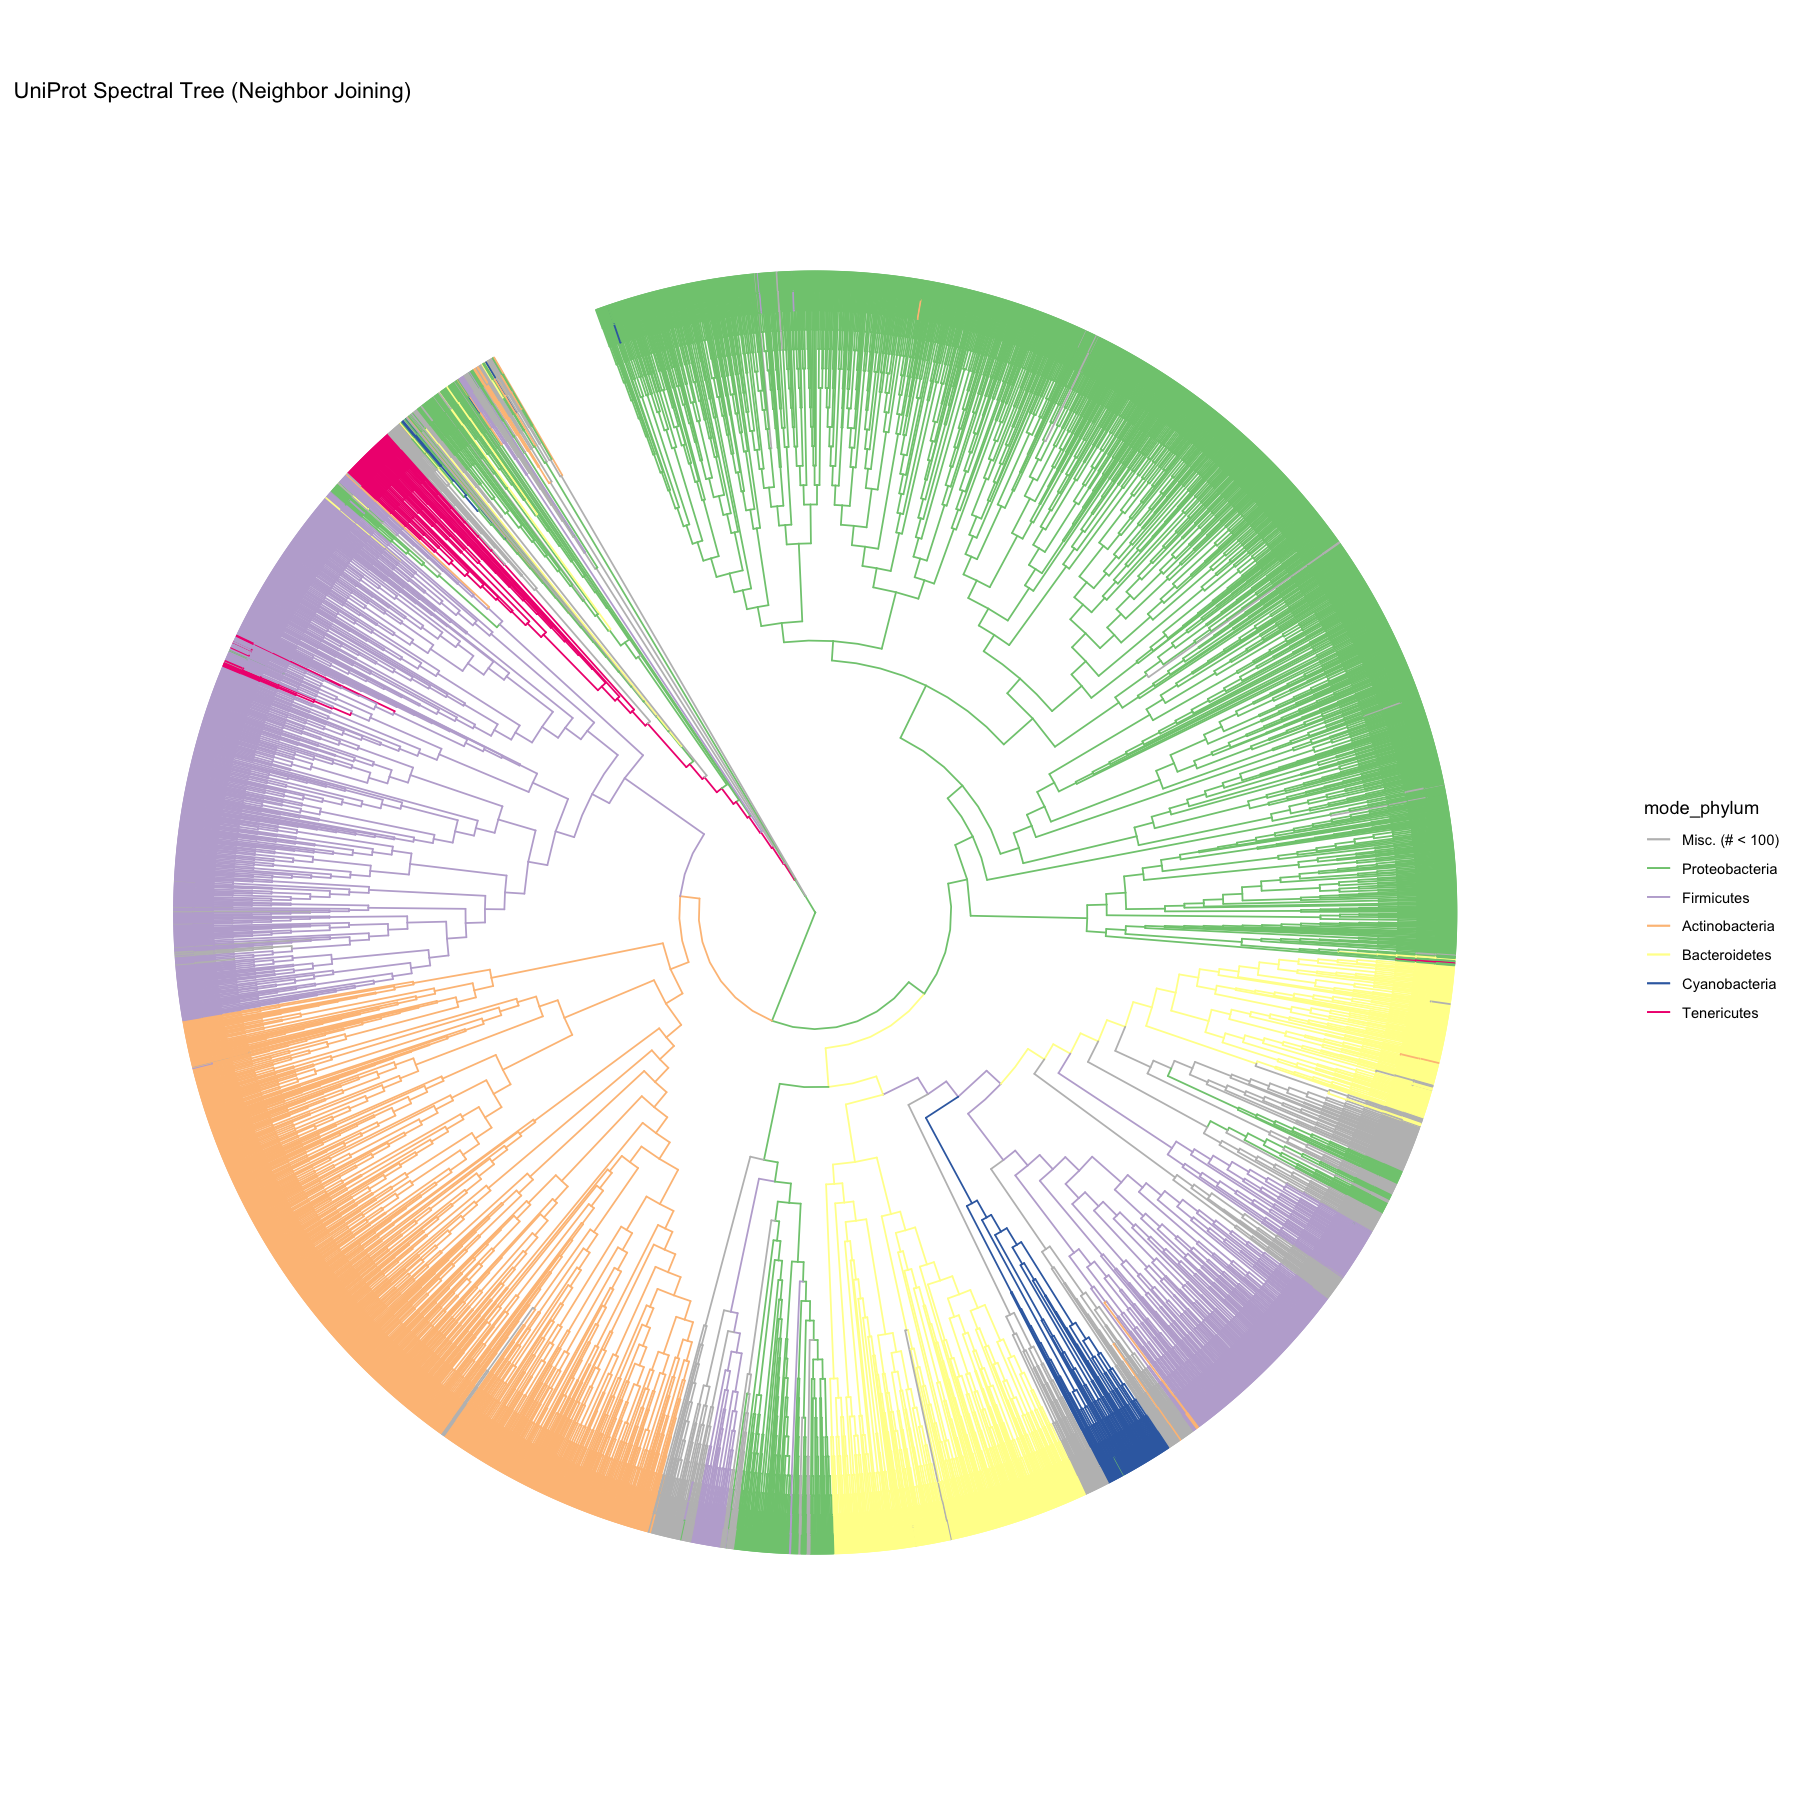

In [272]:
options(repr.plot.width=15, repr.plot.height=15, ignore.negative.edge=TRUE)
colorvalues = c("grey", RColorBrewer::brewer.pal(6, name="Accent"), "grey")
ggtree(uniprot_spitree_withdata, 
    aes(color=mode_phylum), 
    layout="fan", open.angle=10,
    branch.length="none",
    )  %>% rotate_tree(-240) +
    ggtitle("UniProt Spectral Tree (Neighbor Joining)") + 
    scale_color_manual(values=colorvalues, breaks=c("Misc. (# < 100)", names(biggerphyla), "unknown")) #+theme(legend.position="none")

In [273]:
ggsave(file.path(pdir, "UniProt_SPItree_coloredbyPhylum.pdf"), 
    height=7,
    width=7,
)

## SPI tree of CSB Biobank

In [107]:
bb669obs = read.table(file.path(getwd(), "data/exp_pro/BB669/BB669_rowmeta.csv"), sep=",", header=1)
# bb669obs$family[bb669obs$genus == "Phocaeicola"] = "Bacteroidaceae" # genus Phocaeicola are in family Bacteroidaceae
bb669obs$family_ncbi[bb669obs$family_ncbi == "<unclassified>"] = "<unknown family>"
bb669tree = read.newick(file.path(getwd(), "data/exp_pro/BB669/BB669_inferred_spitree_nj.nw"))
bb669tree = as.treedata(left_join(as_tibble(bb669tree), bb669obs, by = c("label" = "ID")))

In [108]:
bb669tree_tbl = as_tibble(bb669tree)

mode_family = offspring(bb669tree_tbl, bb669tree_tbl$node, tiponly = FALSE, self_include = TRUE)
mode_family = unlist(lapply(mode_family, function(x) modeest::mfv1(x$family_ncbi, na_rm=TRUE)))

bb669tree_tbl$mode_family = mode_family
bb669tree = as.treedata(bb669tree_tbl)

In [109]:
familynames = names(sort(table(bb669obs$family_ncbi), decreasing = TRUE))

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



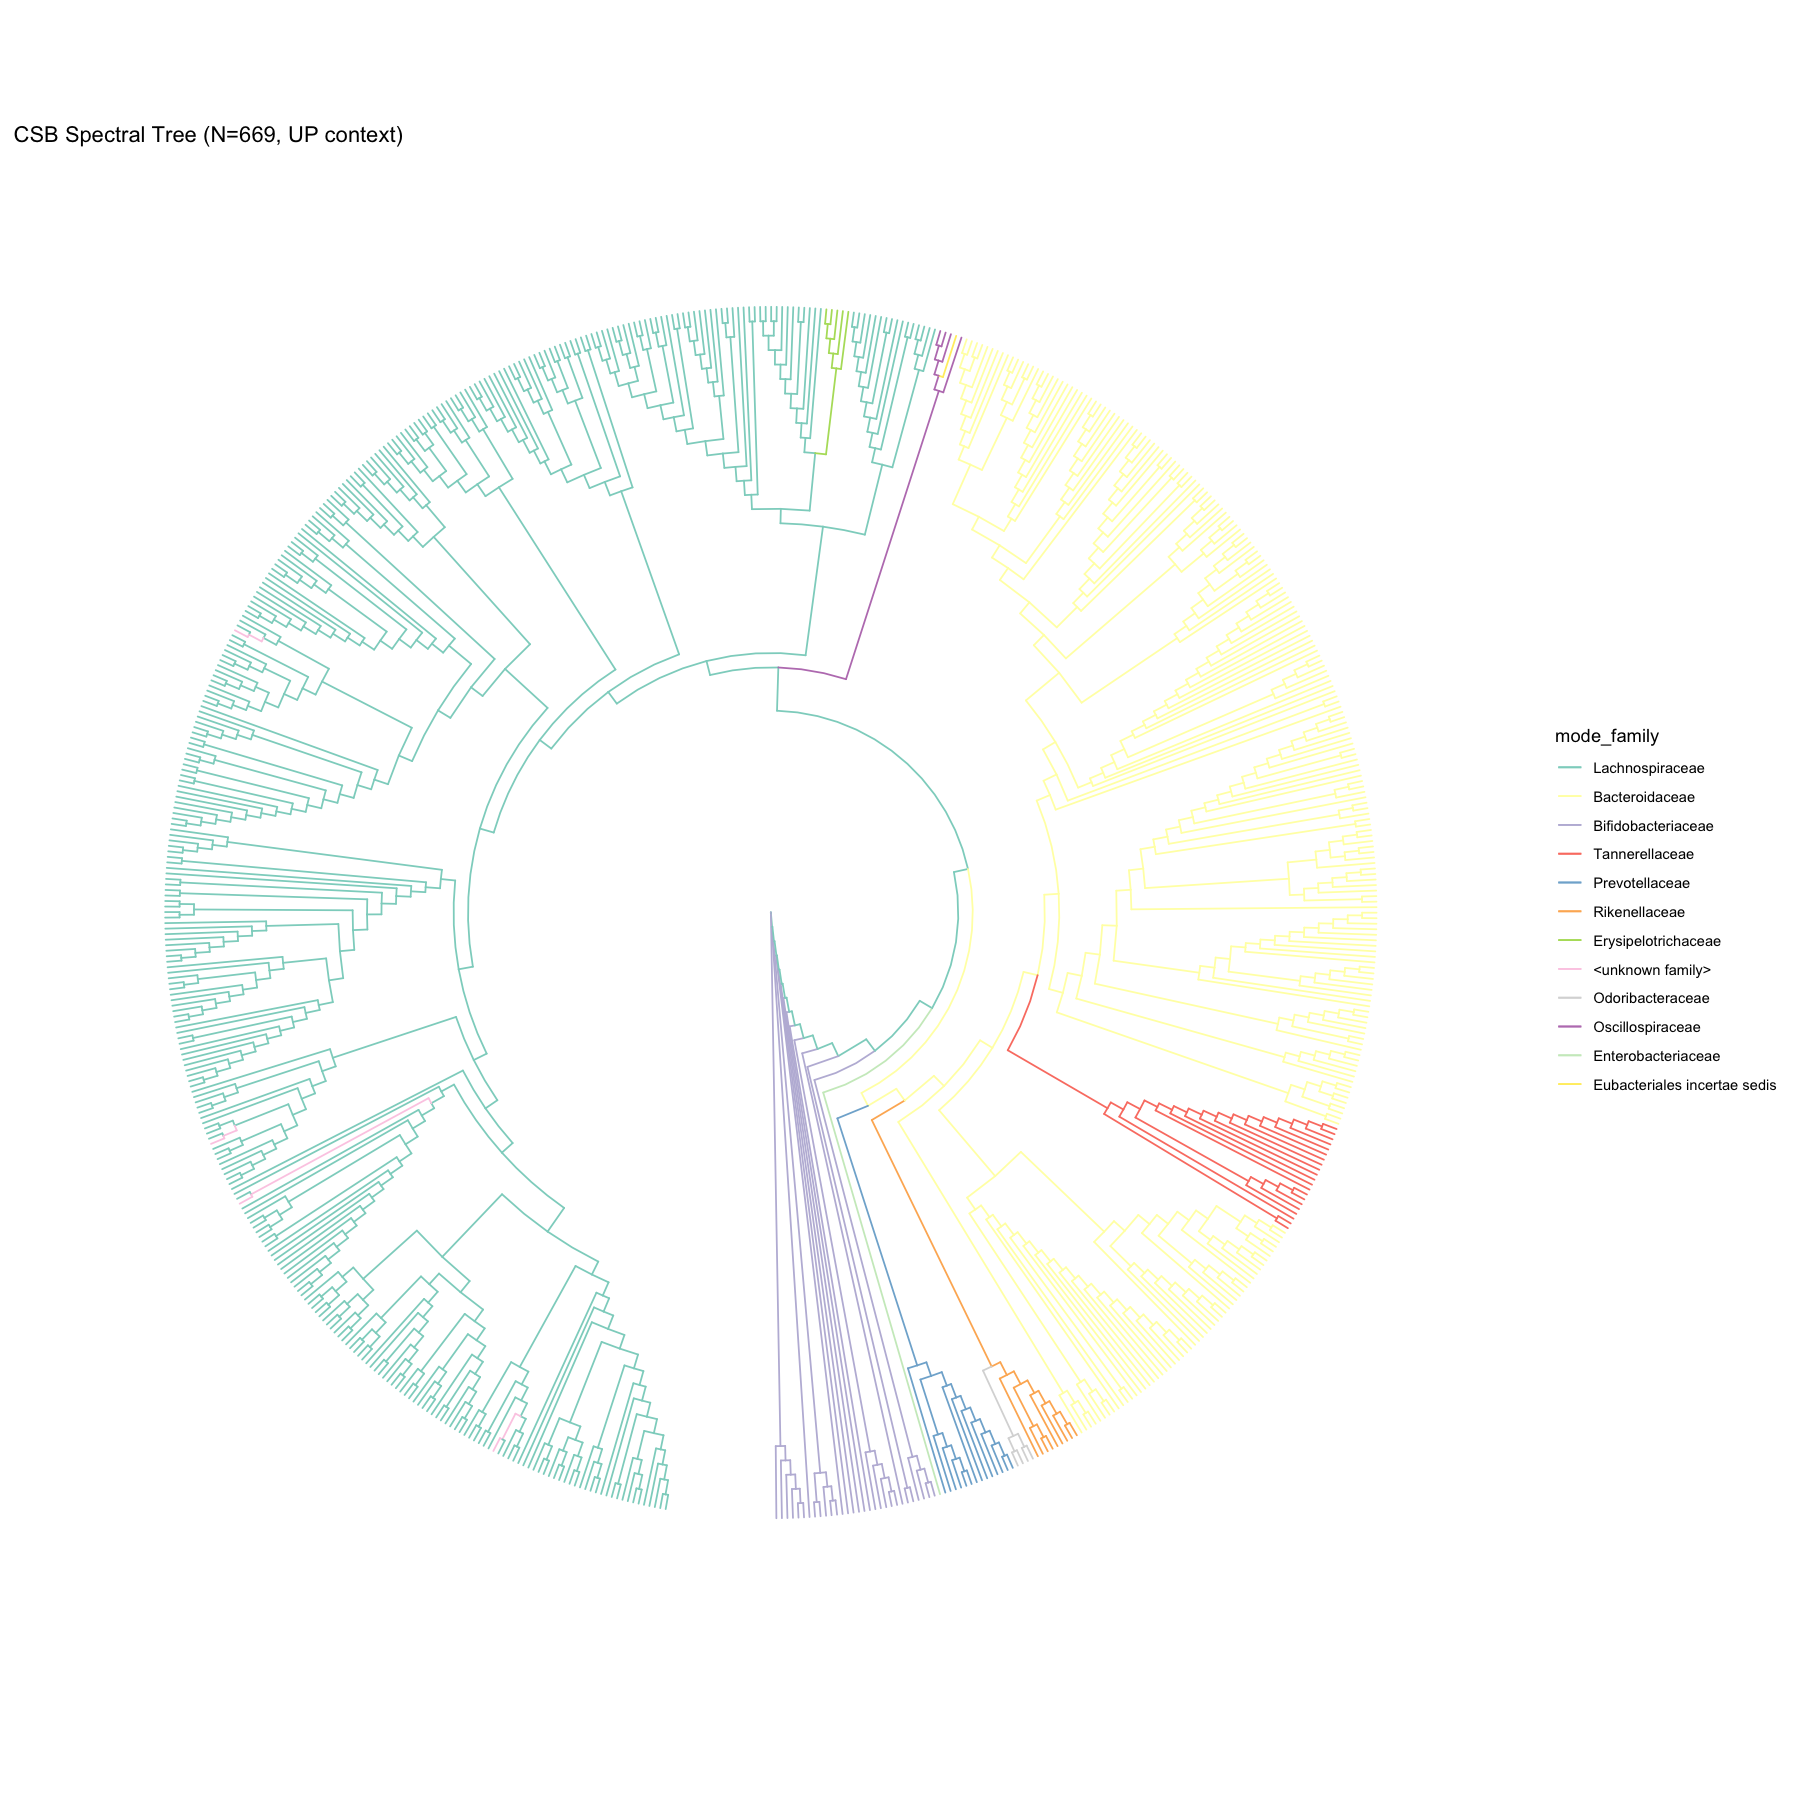

In [64]:
options(repr.plot.width=15, repr.plot.height=15, ignore.negative.edge=TRUE)
colorvalues = RColorBrewer::brewer.pal(12, name="Set3")
ggtree(bb669tree, 
    aes(color=mode_family), 
    size=.5,
    layout="fan", open.angle=10,
    branch.length="none",
    )  %>% rotate_tree(-90) +
    ggtitle("CSB Spectral Tree (N=669, UP context)") + 
    scale_color_manual(values=colorvalues, breaks=familynames) #+theme(legend.position="none")

In [65]:
ggsave(file.path(pdir, "CSB_spectraltree_n669_UPcontext.pdf"), 
    height=7,
    width=7,
)

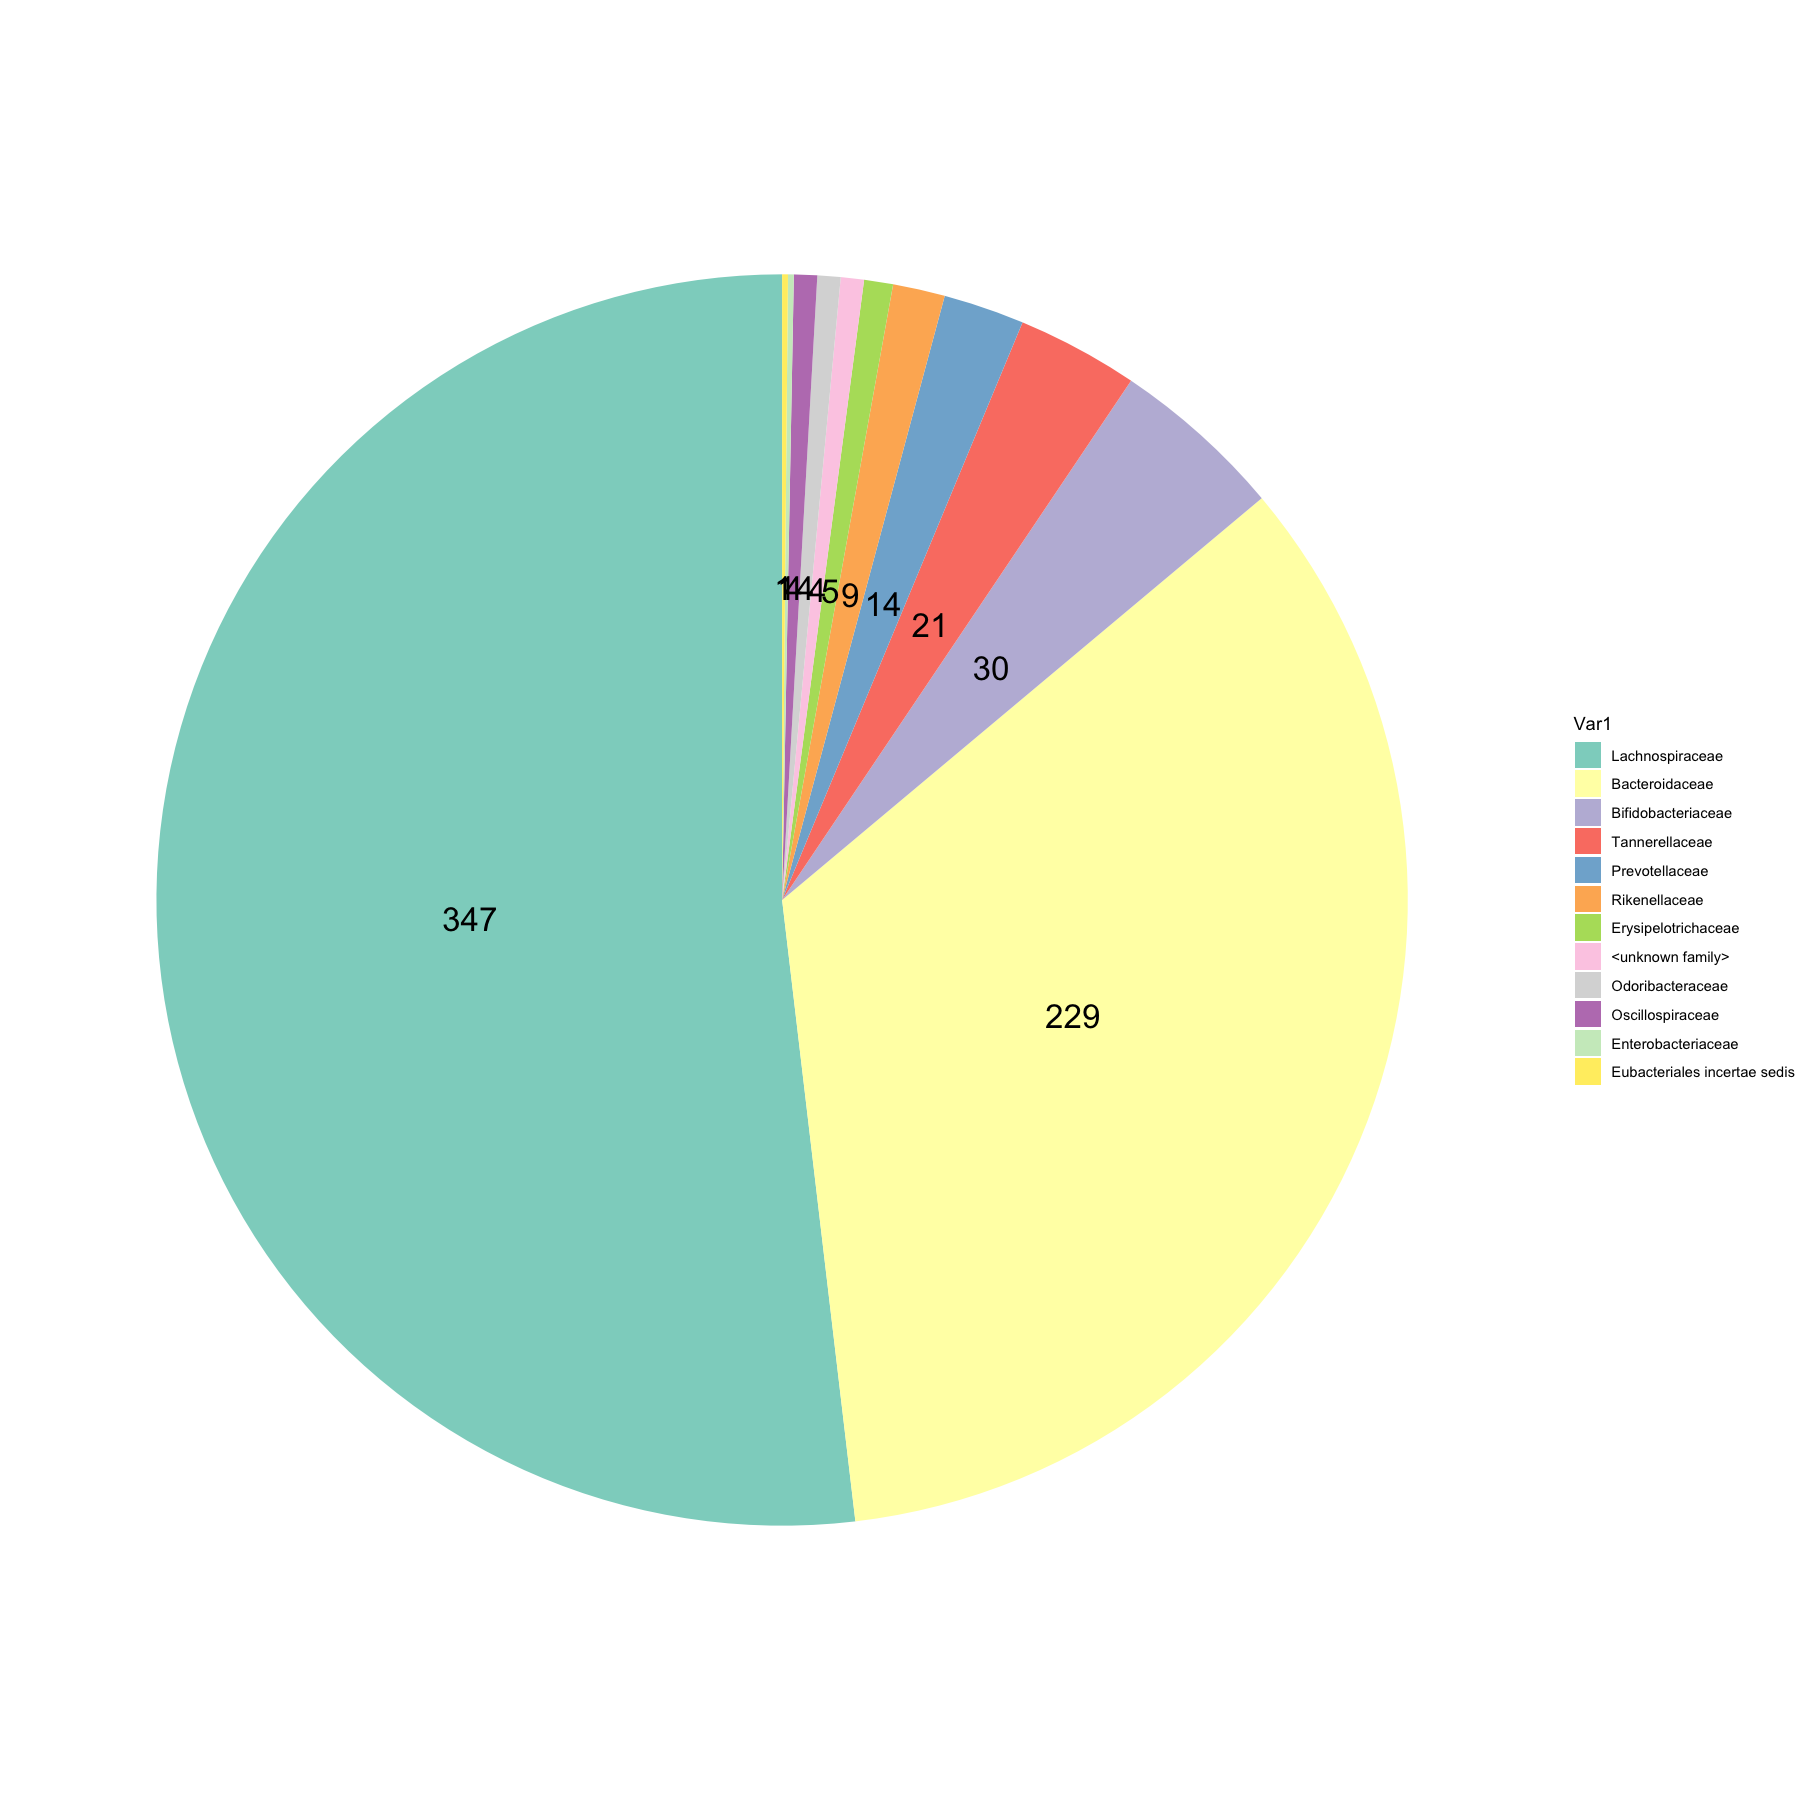

In [67]:
data.frame(sort(table(bb669obs$family_ncbi), decreasing = TRUE)) %>%
    ggplot() + 
        geom_col(aes(x="", y=Freq, fill=Var1)) + 
        geom_text(aes(x="", y=rev(Freq), label = rev(Freq)), size=7, position = position_stack(vjust = 0.5)) +
        coord_polar(theta="y") +
        scale_fill_manual(values=colorvalues, breaks=familynames) +
        theme_void()

In [68]:
ggsave(file.path(pdir, "CSB_familypiechart_n669_UPcontext.pdf"), 
    height=7,
    width=7,
)

### CSB 669 tree with tip labels

In [110]:
bb669tree_tbl = as_tibble(bb669tree)

mode_species = offspring(bb669tree_tbl, bb669tree_tbl$node, tiponly = FALSE, self_include = TRUE)
mode_species = unlist(lapply(mode_species, function(x) ifelse(length(unique(x$species_ncbi)) < 3, x$species_ncbi[1], NA)))

bb669tree_tbl$mode_species = mode_species
bb669tree = as.treedata(bb669tree_tbl)

In [131]:
bb669tree_tbl = as_tibble(bb669tree)

bb669tree_tbl$label = paste(str_pad(bb669tree_tbl$strain_id, 10, side="right"), bb669tree_tbl$species_ncbi, sep=" ")
bb669tree = as.treedata(bb669tree_tbl)

In [148]:
install.packages("scico")


The downloaded binary packages are in
	/var/folders/lb/7gfx254569x0vc6zg3mjqg8h0000gn/T//RtmpiZ5EhY/downloaded_packages


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



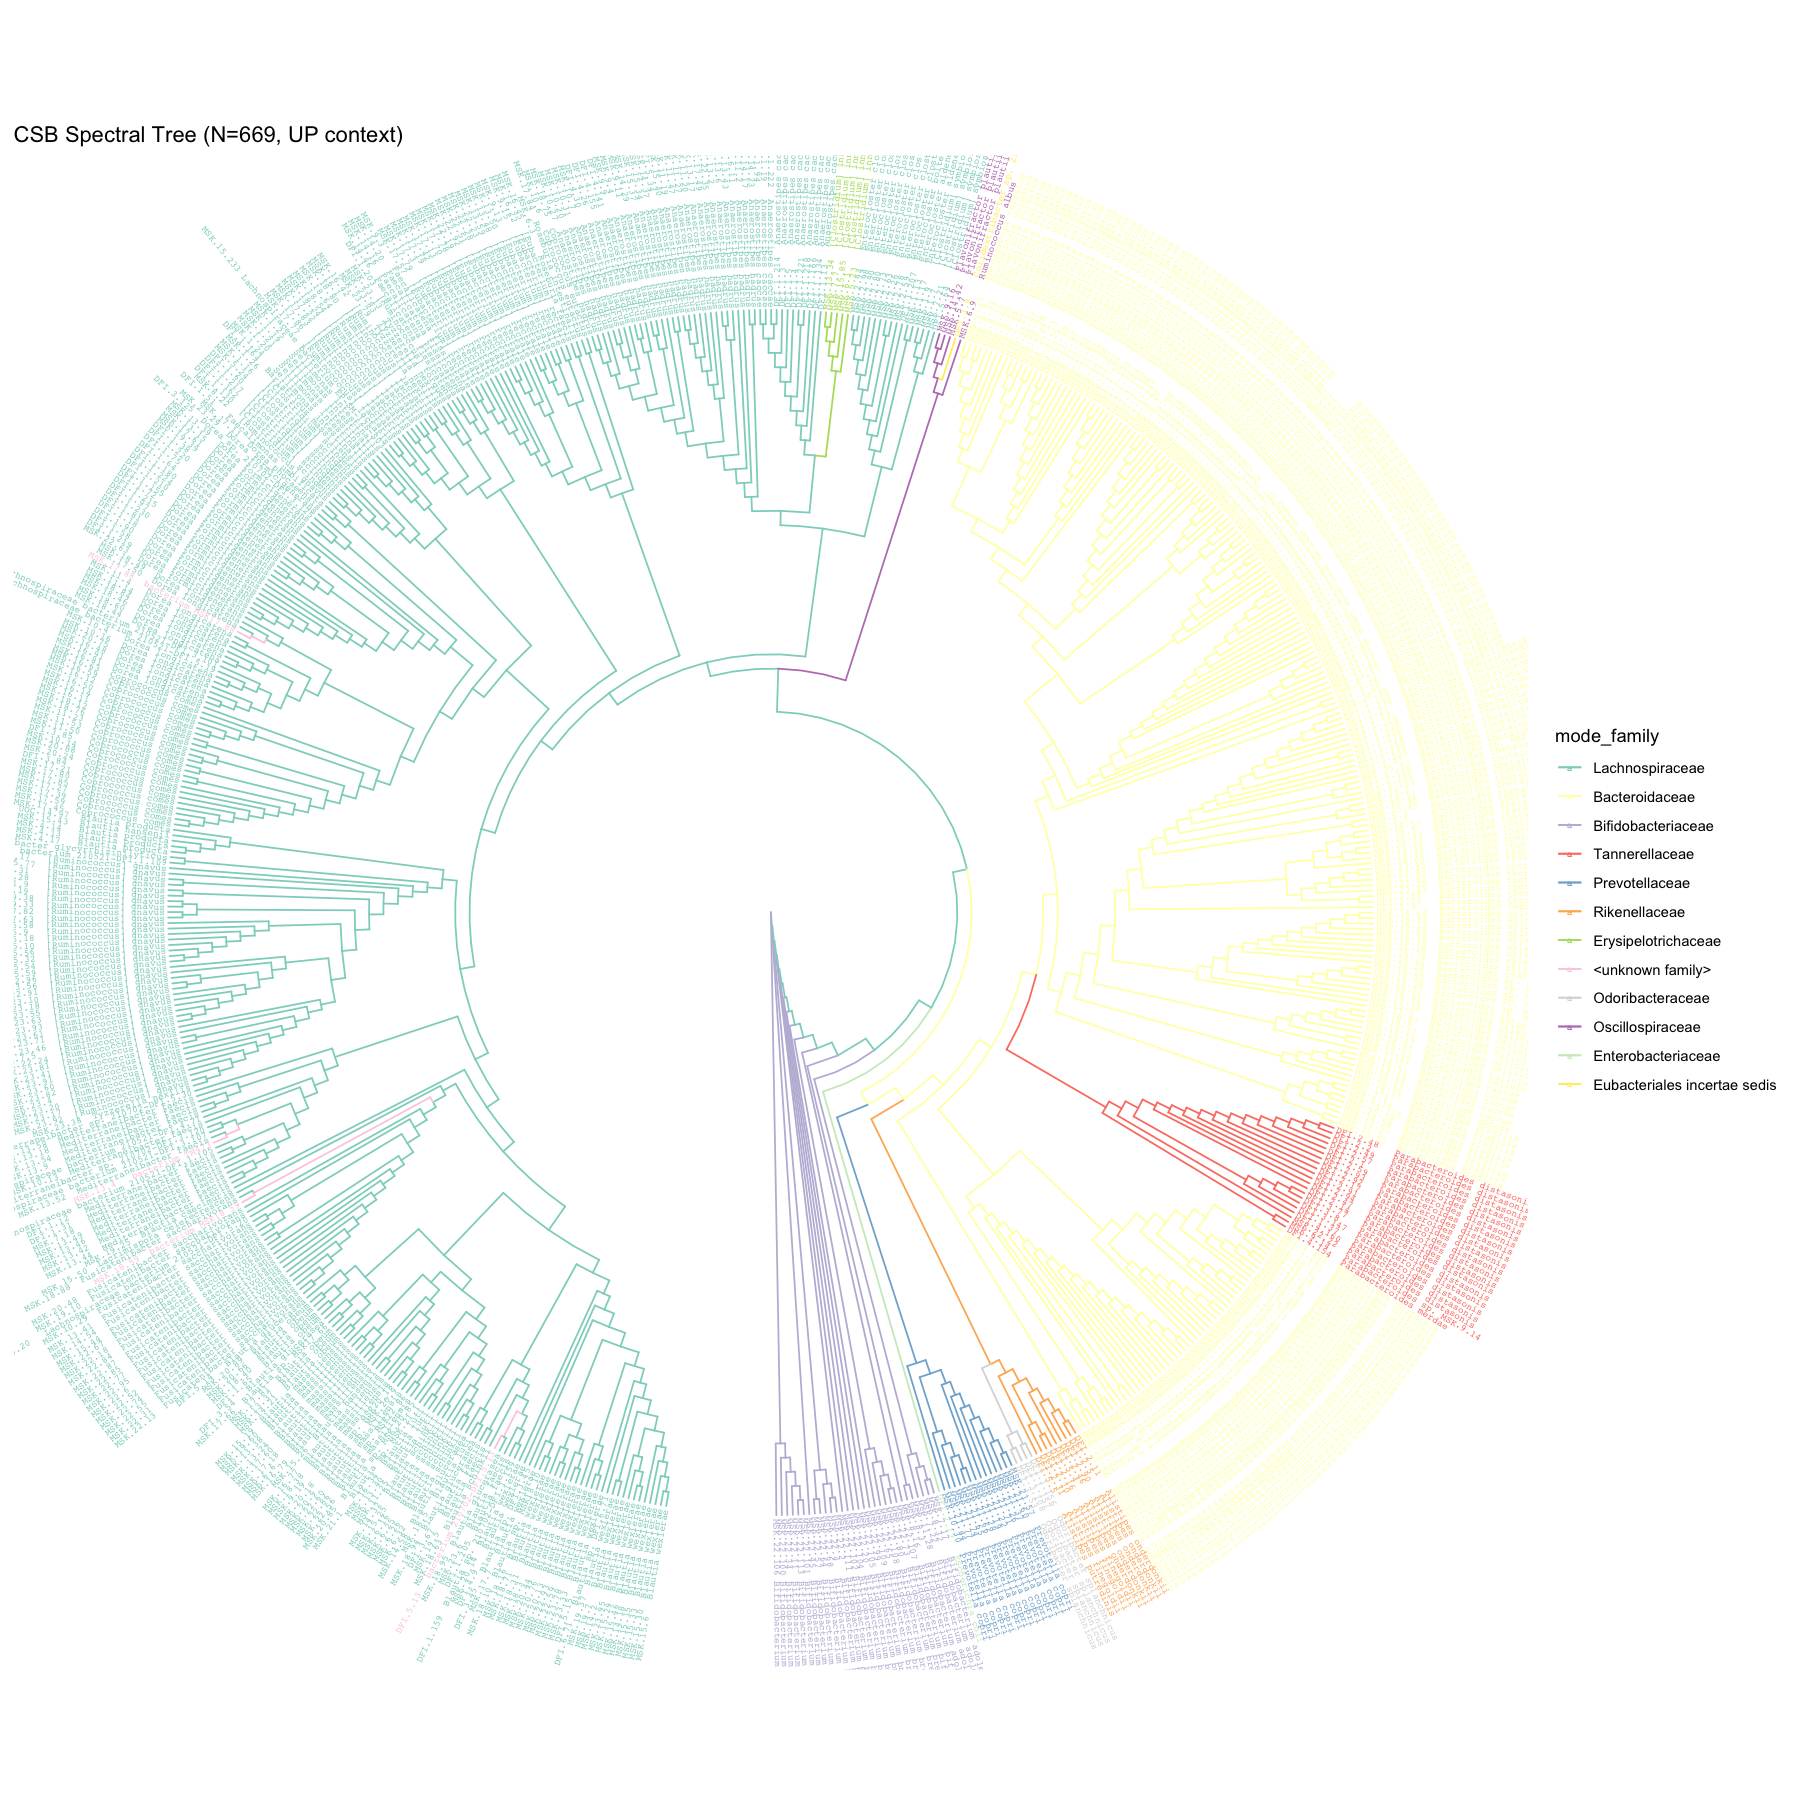

In [171]:
options(repr.plot.width=15, repr.plot.height=15, ignore.negative.edge=TRUE)
# colorvalues = RColorBrewer::brewer.pal(12, name="Set3")

ggtree(bb669tree, 
    aes(color=mode_family), 
    size=.5,
    layout="fan", open.angle=10,
    branch.length="none",
    )  %>% rotate_tree(-90) +
    geom_tiplab2(aes(text=paste(strain_id, species_ncbi)), size=2, family="mono") +
    ggtitle("CSB Spectral Tree (N=669, UP context)") +
    # ggsci::scale_color_futurama() #+
    # scico::scale_color_scico_d(palette="hawaii") +
    scale_color_manual(values=colorvalues, breaks=familynames) #+
    # theme(legend.position="none")

In [172]:
ggsave(file.path(pdir, "CSB_spectraltree_n669_UPcontext_with_tiplabels.pdf"), 
    height=15,
    width=15,
)

### Biobank with N=728

In [23]:
bb728obs = read.csv(file.path(getwd(), "data/exp_pro/BB728/BB728_obsdata.csv"), sep=",", header=1)
bb728obs$family[bb728obs$genus == "Phocaeicola"] = "Bacteroidaceae" # vulgatus are technically Bacteroidaceae now
bb728obs$family[bb728obs$family == ""] = "<unknown family>"
bb728tree = read.newick(file.path(getwd(), "data/exp_pro/bb728/inferrednewicktree_UP7047.nw"))
bb728tree = as.treedata(left_join(as_tibble(bb728tree), bb728obs, by = c("label" = "ID")))

In [24]:
bb728tree_tbl = as_tibble(bb728tree)

mode_family = offspring(bb728tree_tbl, bb728tree_tbl$node, tiponly = FALSE, self_include = TRUE)
mode_family = unlist(lapply(mode_family, function(x) modeest::mfv1(x$family, na_rm=TRUE)))

bb728tree_tbl$mode_family = mode_family
bb728tree = as.treedata(bb728tree_tbl)

In [25]:
familynames = names(sort(table(bb728obs$family), decreasing = TRUE))
colorvalues = RColorBrewer::brewer.pal(11, name="Set3")
colorvalues = c(colorvalues[1:6], "#CCCCCC", colorvalues[7:12])

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



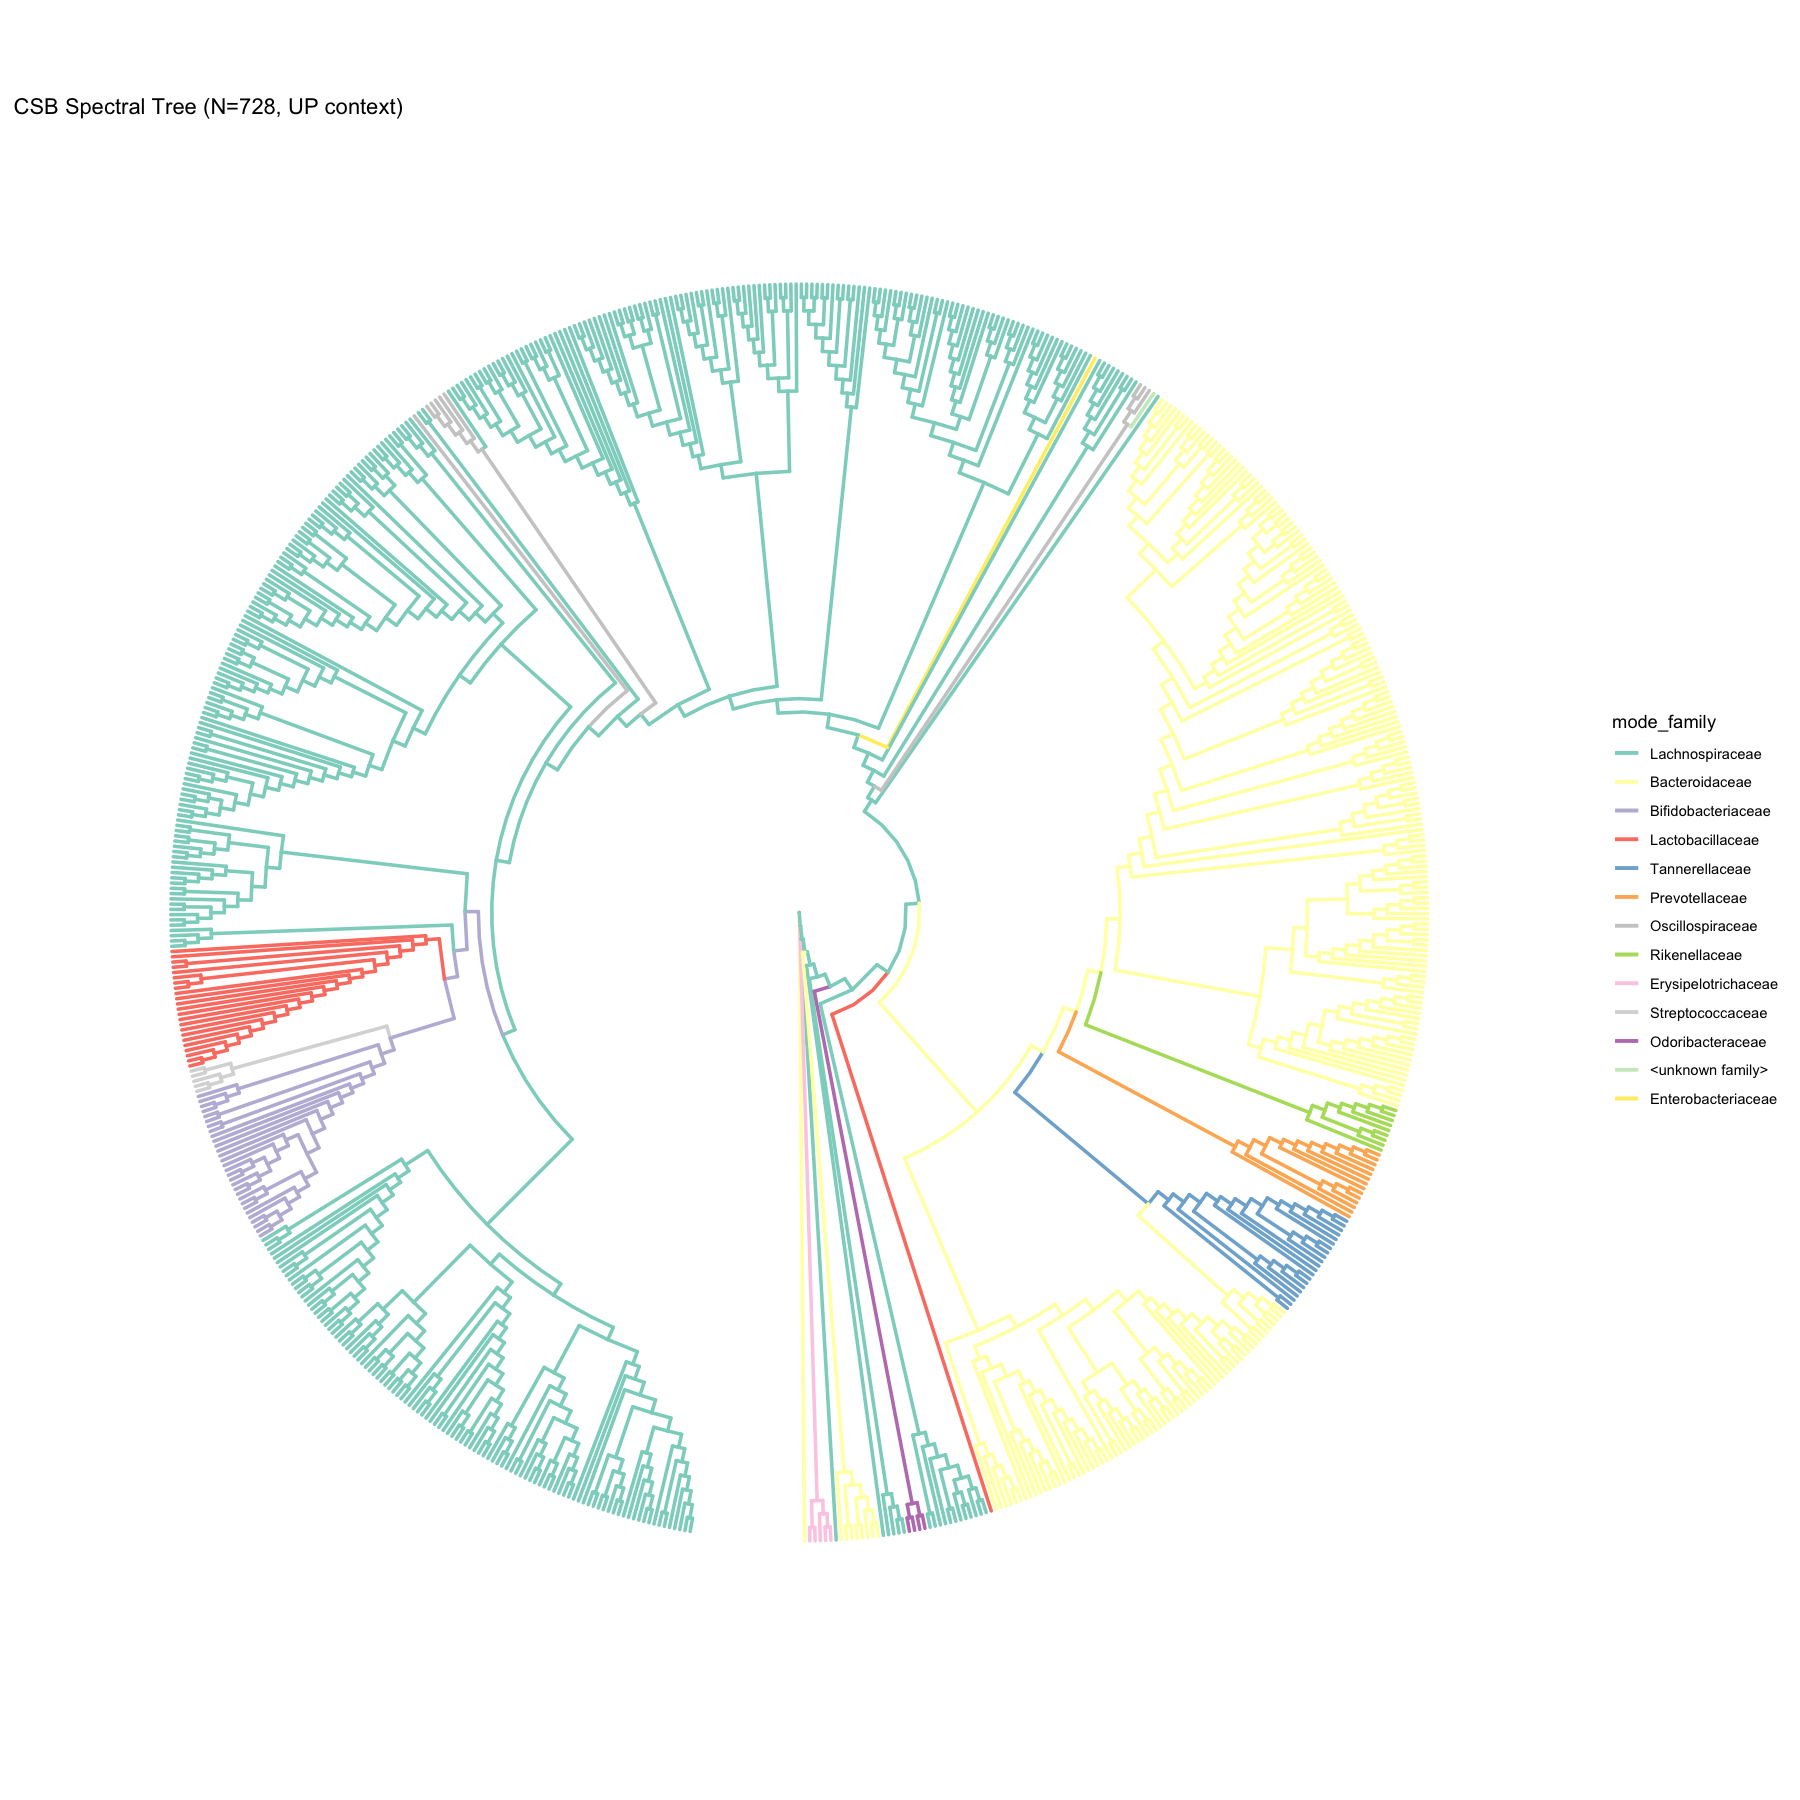

In [26]:
options(repr.plot.width=15, repr.plot.height=15, ignore.negative.edge=TRUE)
ggtree(bb728tree, 
    aes(color=mode_family), 
    size=1,
    layout="fan", open.angle=10,
    branch.length="none",
    )  %>% rotate_tree(-90) +
    ggtitle("CSB Spectral Tree (N=728, UP context)") + 
    scale_color_manual(values=colorvalues, breaks=familynames) #+theme(legend.position="none")

In [27]:
ggsave(file.path(pdir, "CSB_spectraltree_n728_UPcontext.pdf"), 
    height=7,
    width=7,
)

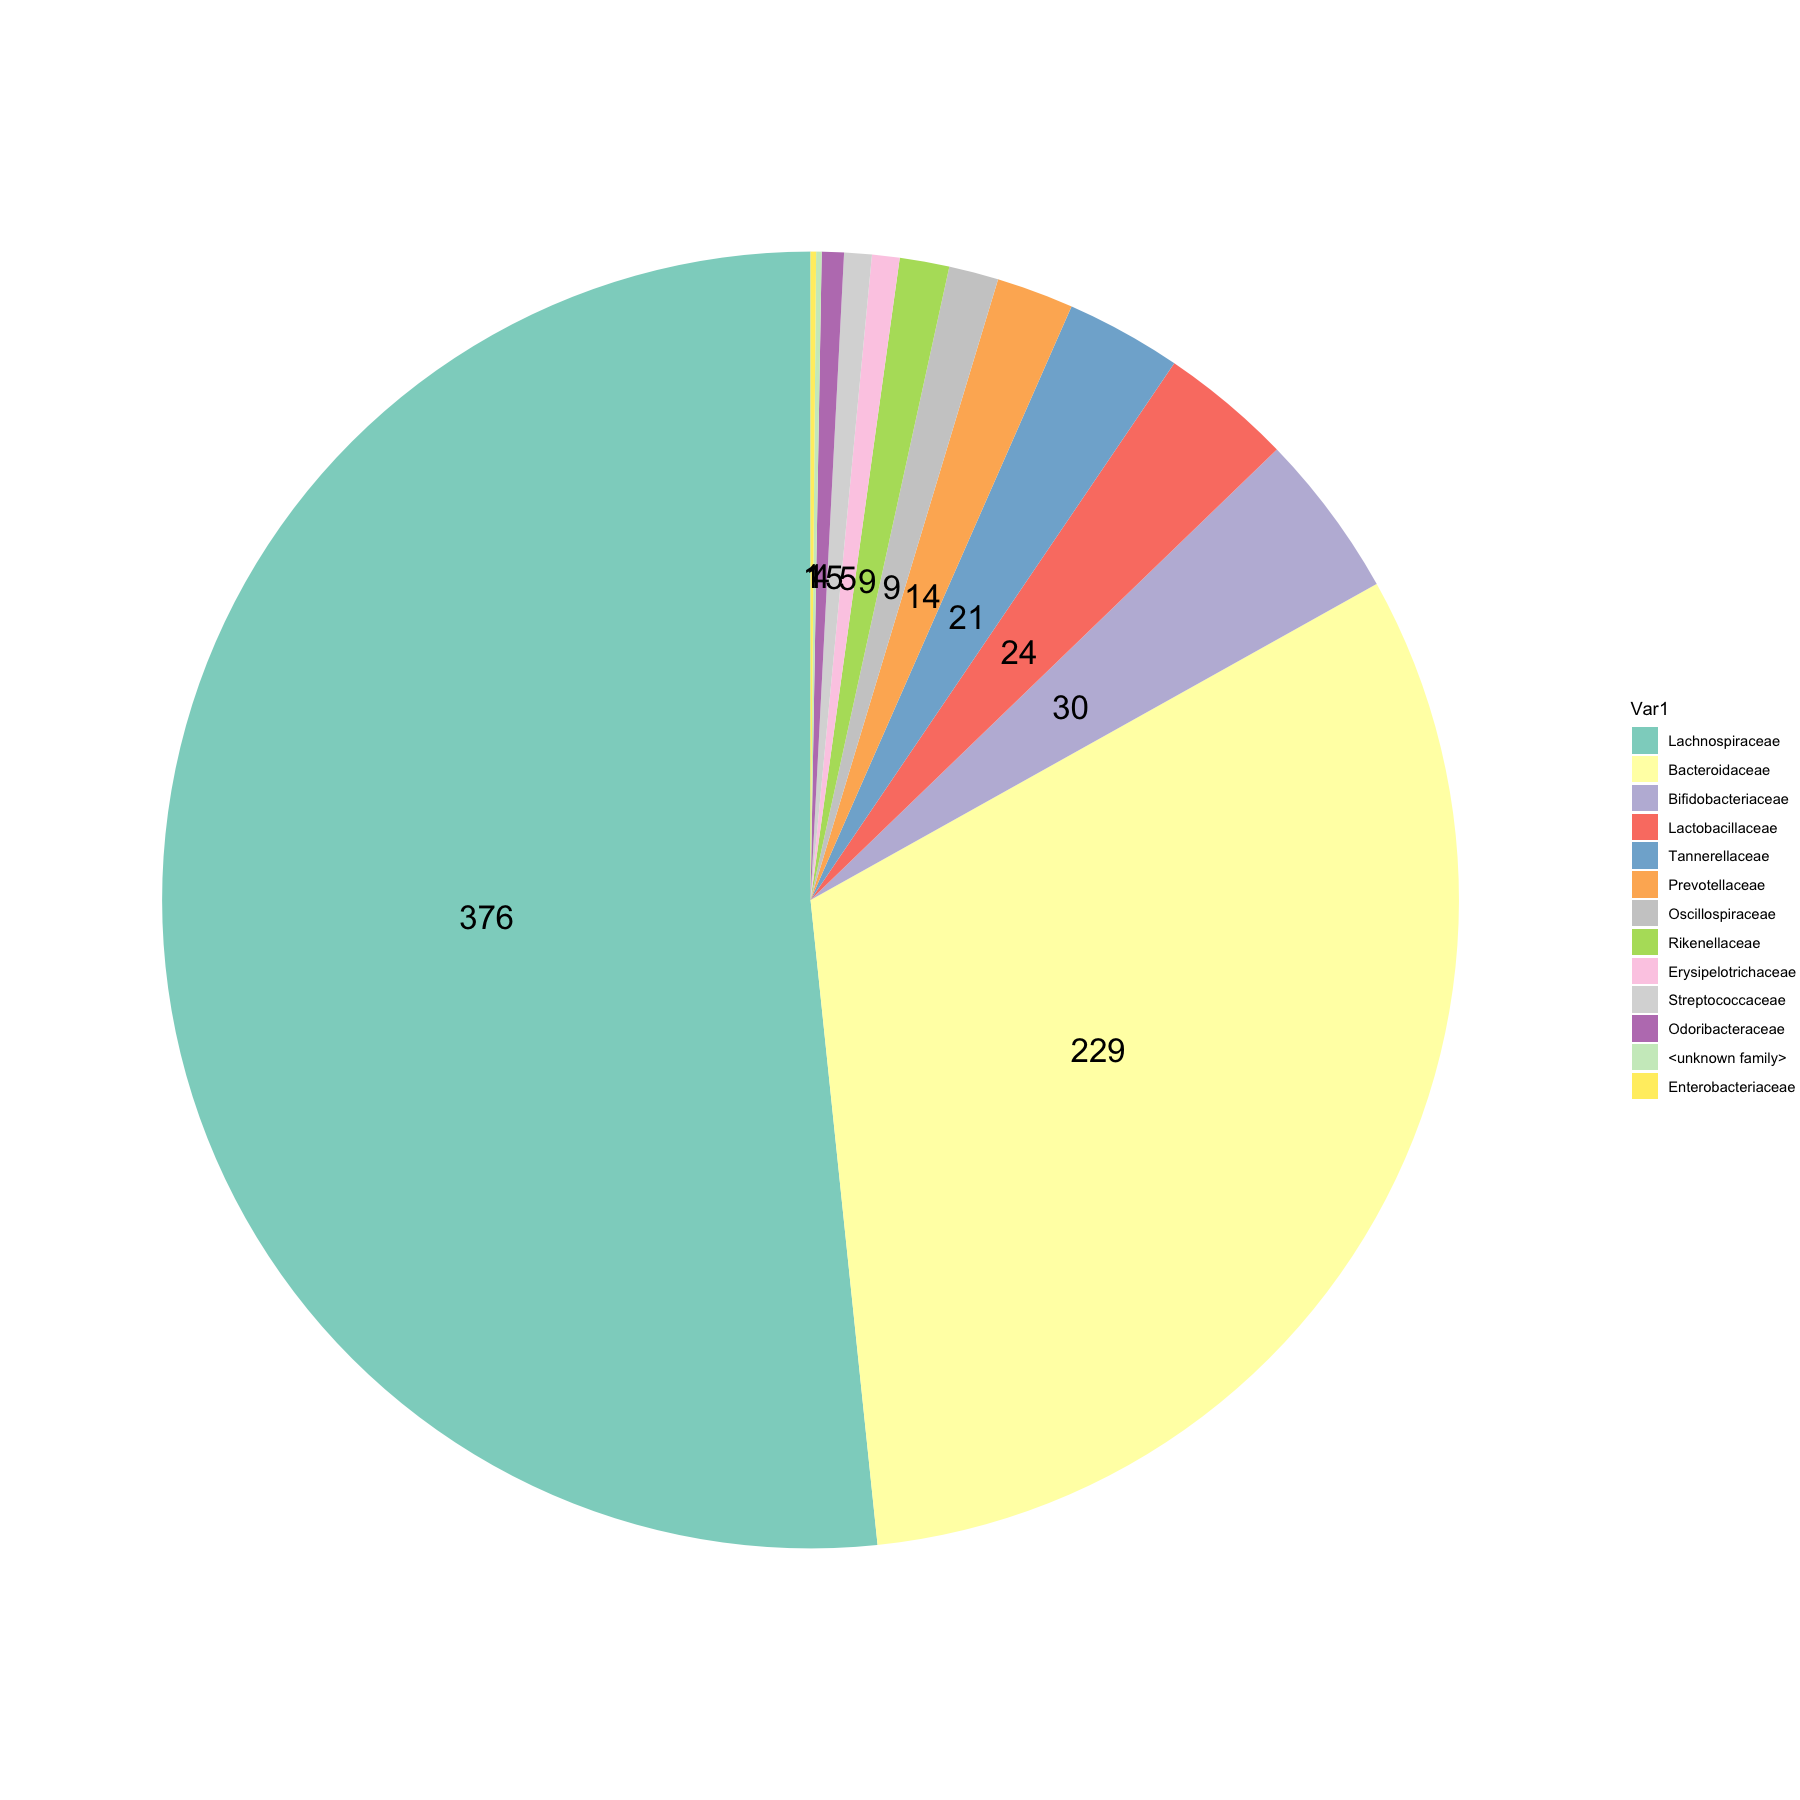

In [28]:
data.frame(sort(table(bb728obs$family), decreasing = TRUE)) %>%
    ggplot() + 
        geom_col(aes(x="", y=Freq, fill=Var1)) + 
        geom_text(aes(x="", y=rev(Freq), label = rev(Freq)), size=7, position = position_stack(vjust = 0.5)) +
        coord_polar(theta="y") +
        scale_fill_manual(values=colorvalues, breaks=familynames) +
        theme_void()

In [29]:
ggsave(file.path(pdir, "CSB_familypiechart_n728_UPcontext.pdf"), 
    height=7,
    width=7,
)